# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [ ]:
%pip install numpy
%pip  install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

In [ ]:
%pip install scikit-learn

In [ ]:
 
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

### Load the dataset

In [14]:
df  = pd.read_csv('./boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Check the shape of the dataset

In [15]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

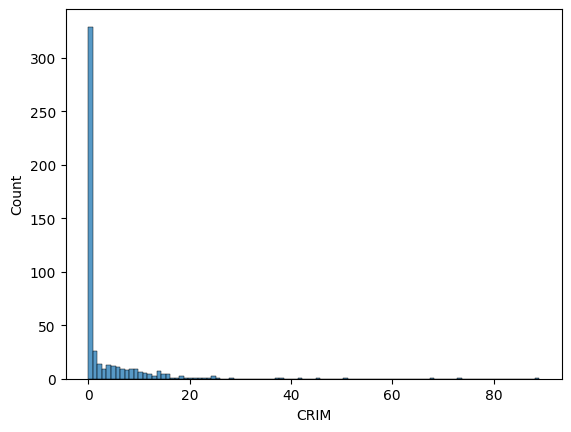

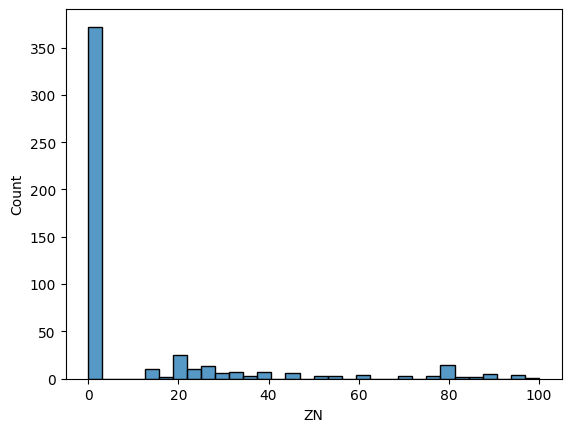

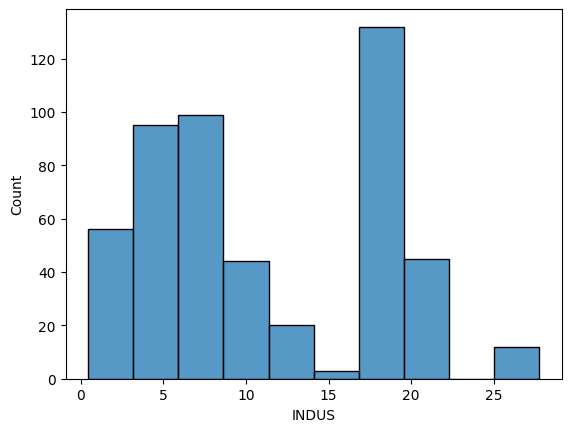

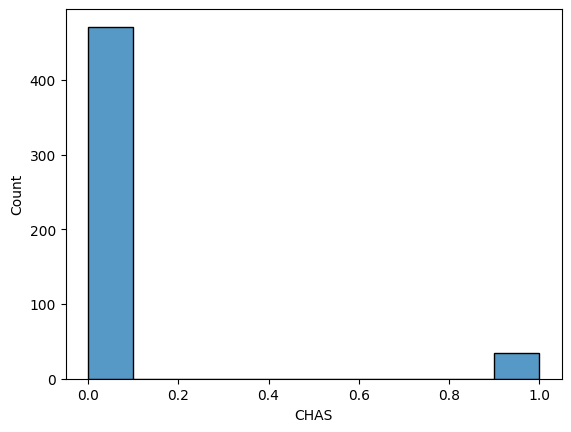

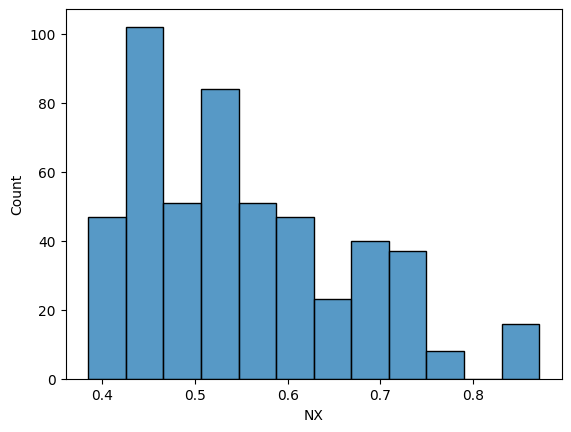

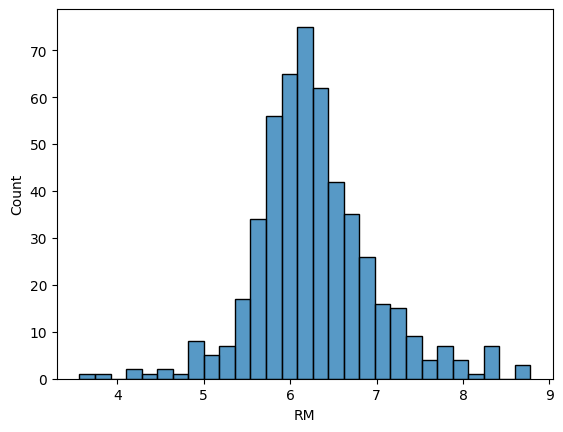

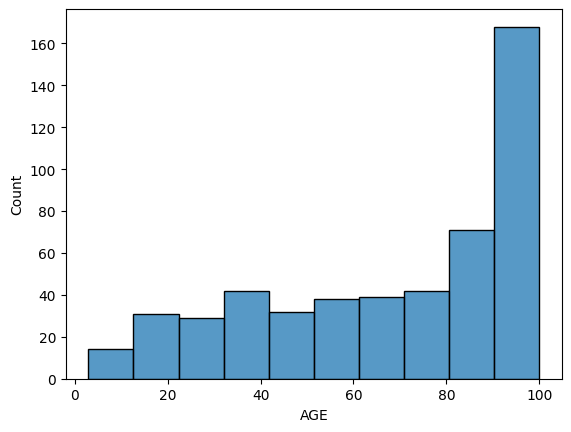

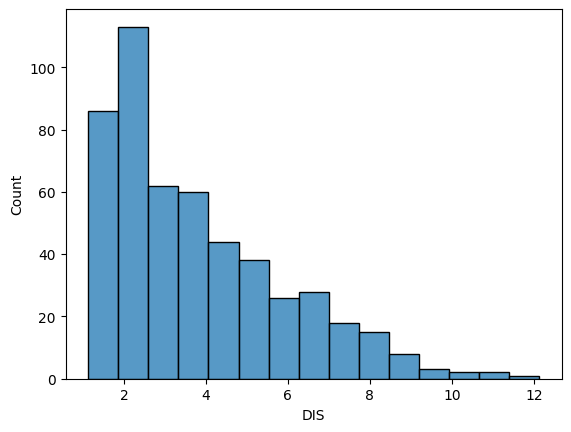

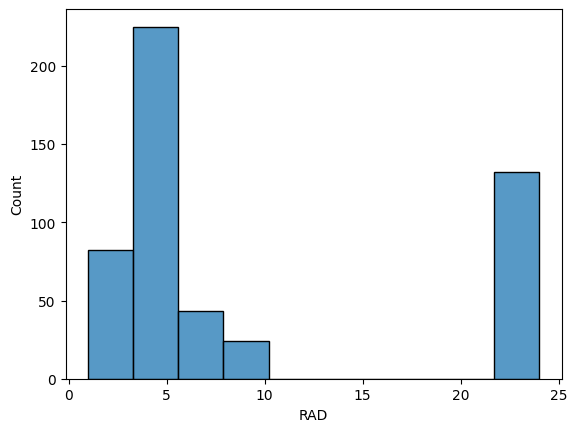

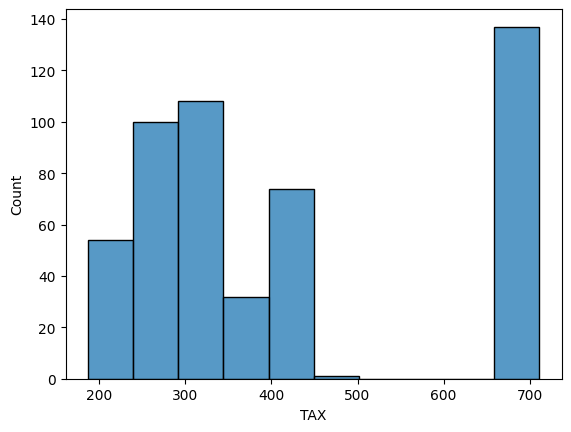

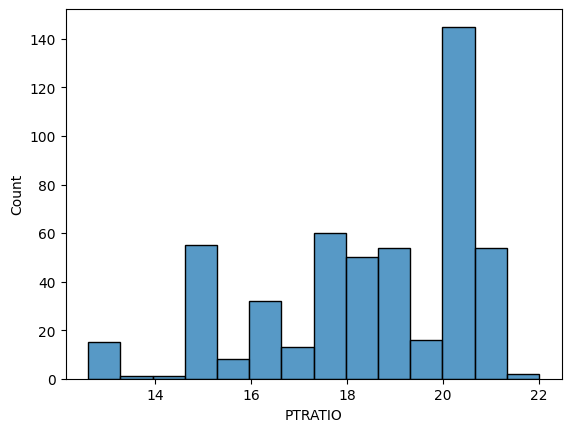

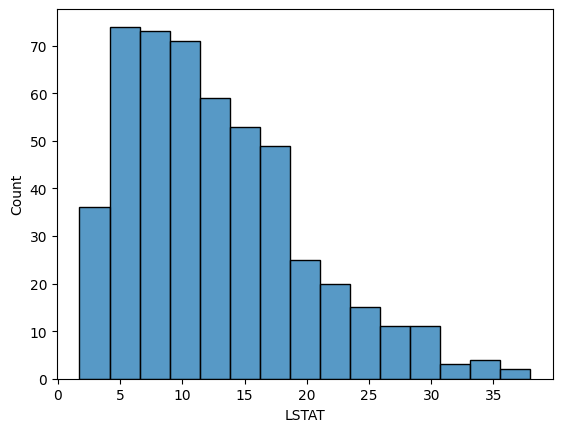

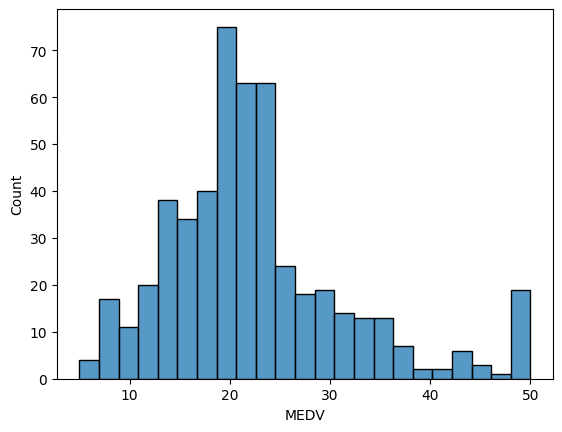

In [20]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()  

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

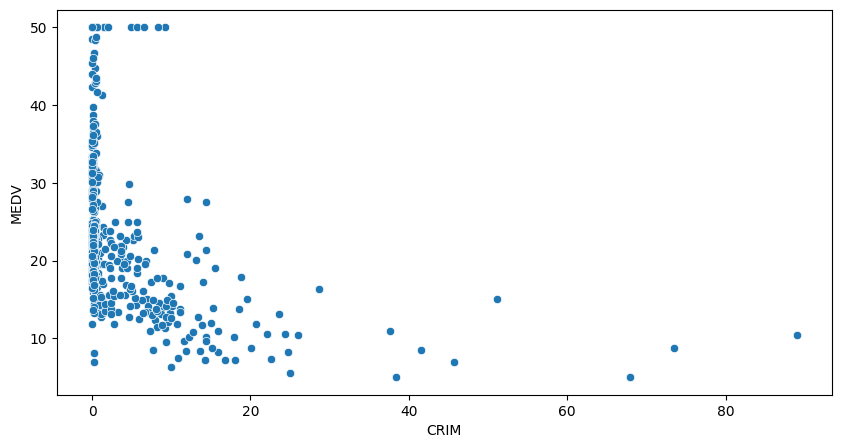

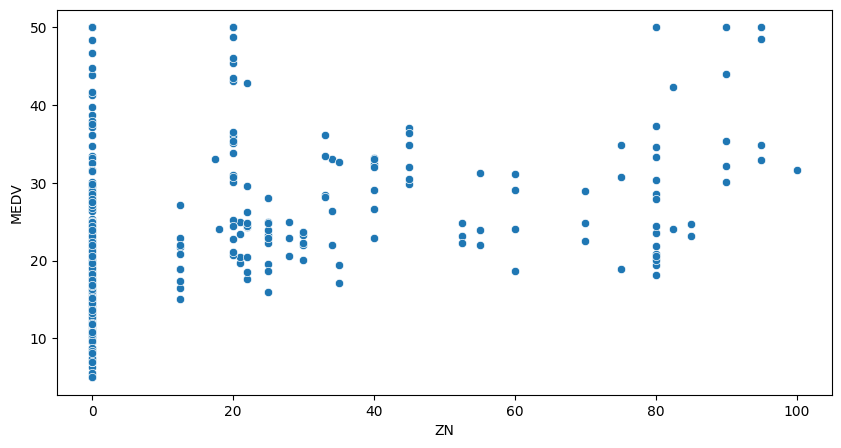

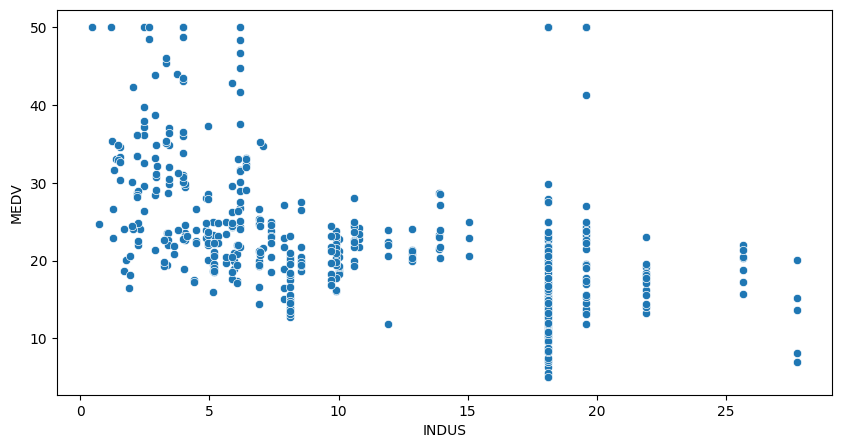

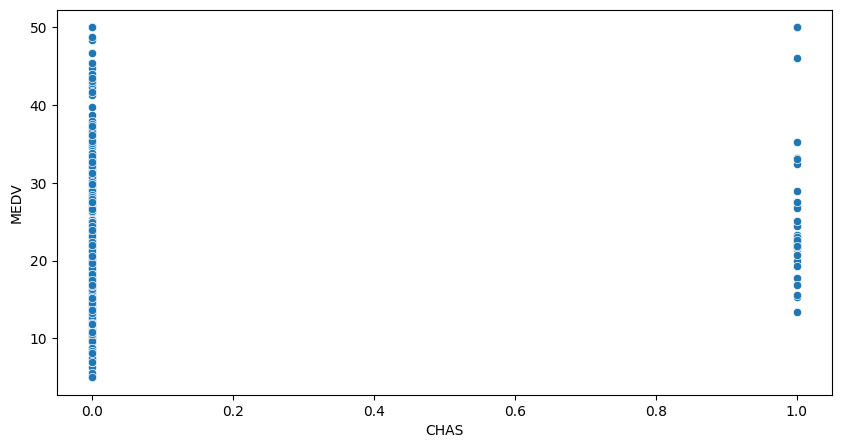

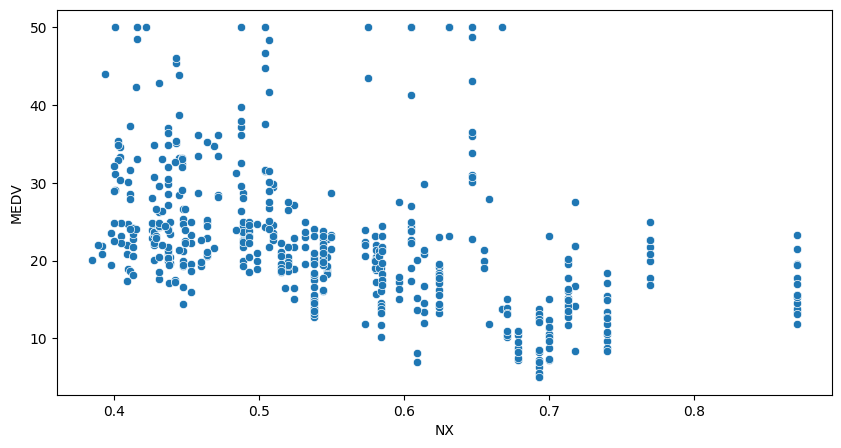

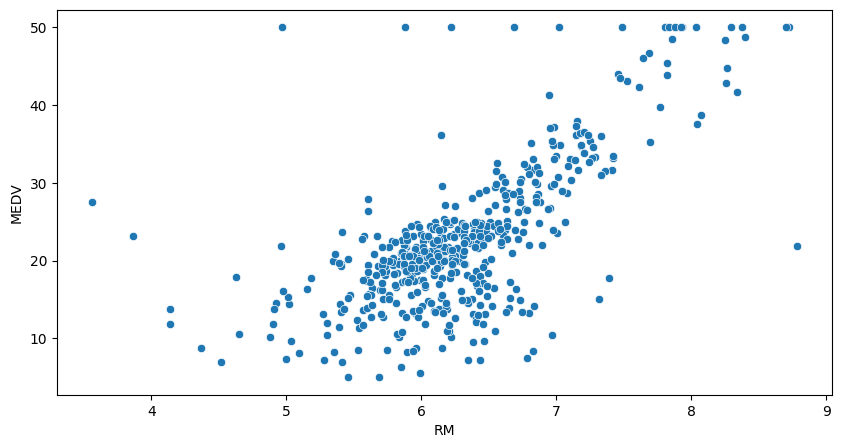

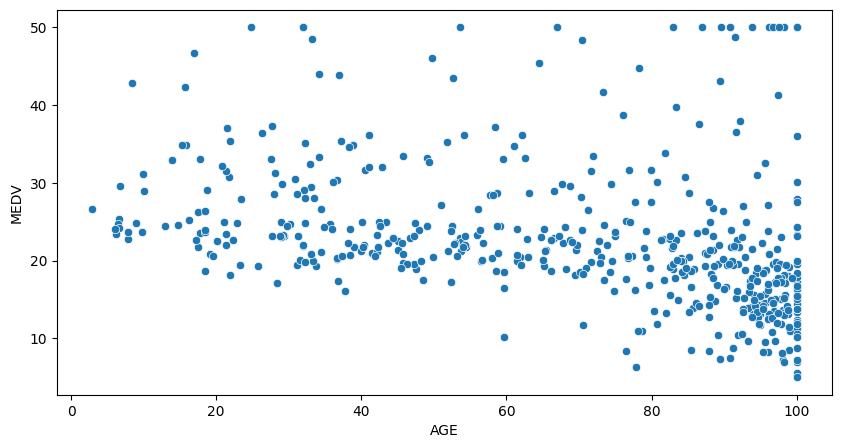

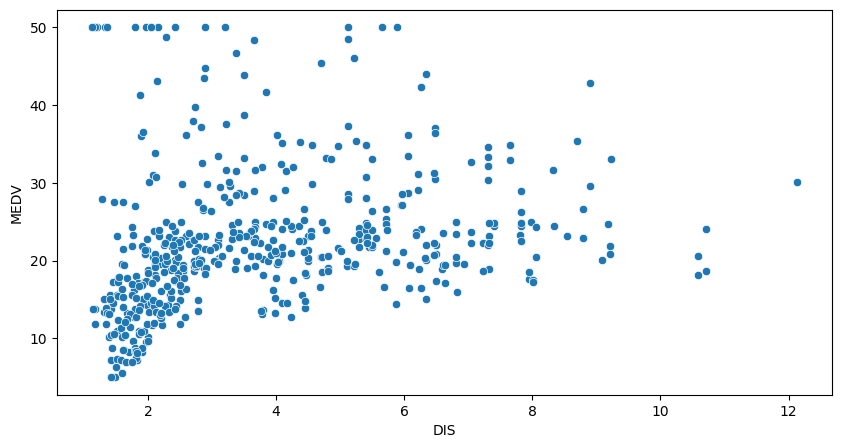

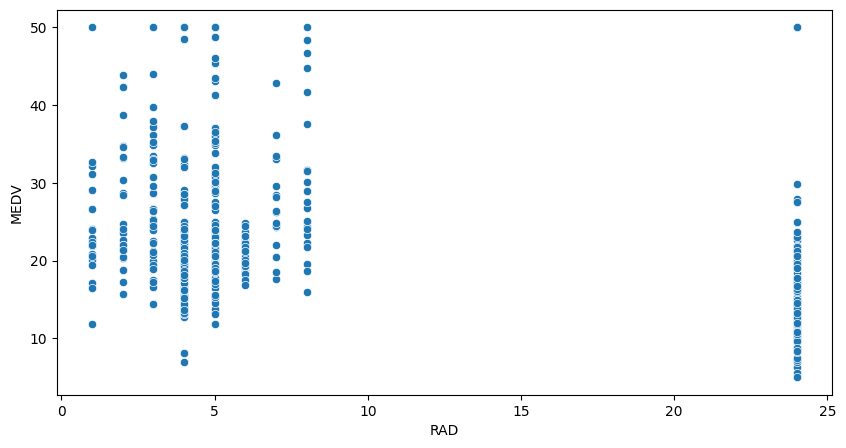

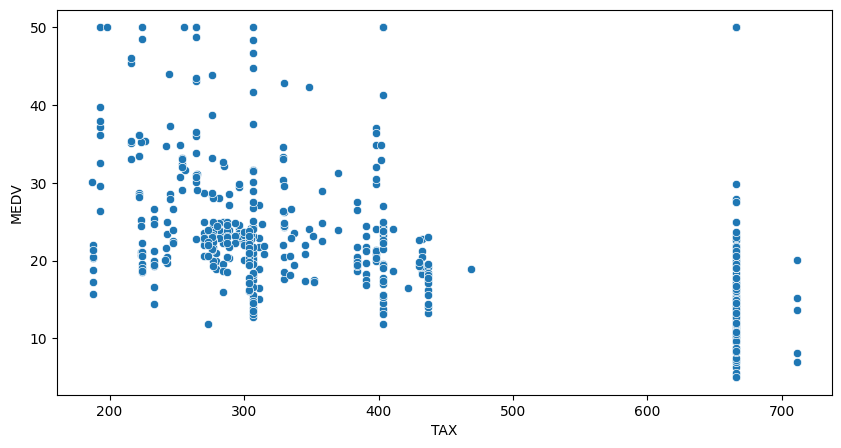

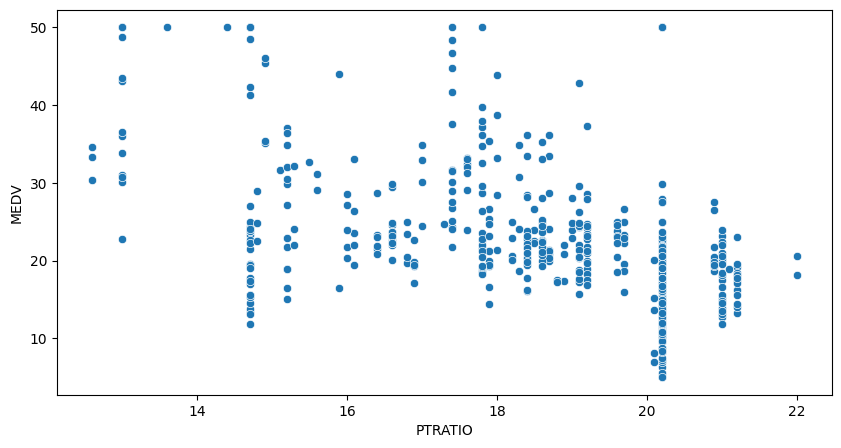

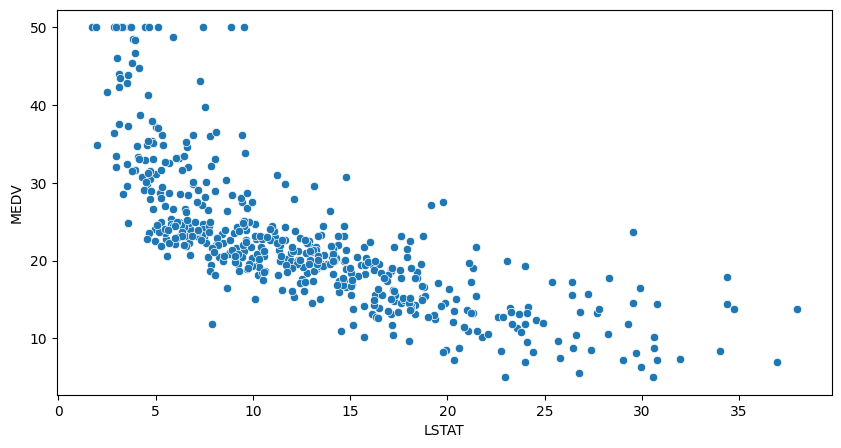

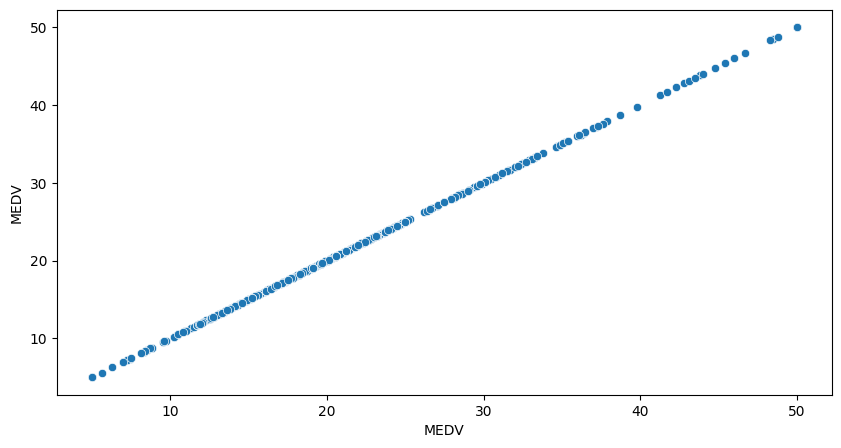

In [25]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df, x = i, y = 'MEDV')
    plt.show()

**Plot the correlation heatmap and list your observations.**

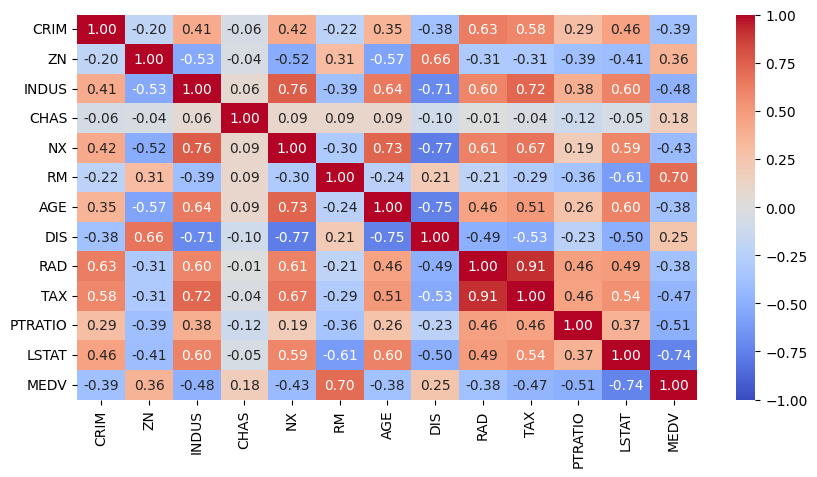

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True ,vmax=1,vmin=-1, cmap='coolwarm', fmt='.2f')
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [27]:
x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

### Model Building

**Fit the model to the training set**

In [29]:
regressionmodel =  LinearRegression()
regressionmodel.fit(x_train,y_train)

LinearRegression()

**Get the score on training set**

In [31]:
print('Score on train data:',regressionmodel.score(x_train,y_train))    

Score on train data: 0.7073732058856179


**Write your own function for the R-squared score.**

In [33]:
def calculate_rsquare(model, x,y):
    y_mean = np.mean(y)
    SST = np.sum((y-y_mean)**2)
    SSE = np.sum((y-model.predict(x))**2)
    rsquare = 1-(SSE/SST)
    return SSE, SST,rsquare

SSE, SST, r_square =  calculate_rsquare(regressionmodel, x_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  8410.365734587129
SST:  28740.928389830508
R-squared:  0.7073732058856179


**Get the score on test set**

In [34]:
print('Score on test data:',regressionmodel.score(x_test,y_test))

Score on test data: 0.7721684899134134


Get the RMSE on Train set   

In [35]:
print(" Root mean squared error for train data is ",np.sqrt(mean_squared_error(y_train,regressionmodel.predict(x_train))))

 Root mean squared error for train data is  4.874227661429436


**Get the RMSE on test set**

In [36]:
print( "root mean squared error: ", np.sqrt(mean_squared_error(y_test, regressionmodel.predict(x_test))))

root mean squared error:  4.569658652745825


**Get the model coefficients.**

In [46]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regressionmodel.coef_, regressionmodel.intercept_),
     index=x.columns.tolist() + ["Intercept"],
     columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.113845
ZN,0.061170
INDUS,0.054103
CHAS,2.517512
NX,-22.248502
RM,2.698413
AGE,0.004836
DIS,-1.534295
RAD,0.298833
TAX,-0.011414


**Automate the equation of the fit**

In [49]:
# Lets us write the linear regression equation
Equation = "Price = " + str(round(regressionmodel.intercept_,2))
for i in range(len(x.columns)):
    Equation = Equation + " + ( " + str(round(regressionmodel.coef_[i],2)) + " )" + "* (" +  x.columns[i] + " )"

print("Linear Regression Equation: ", Equation)

Linear Regression Equation:  Price = 49.89 + ( -0.11 )* (CRIM ) + ( 0.06 )* (ZN ) + ( 0.05 )* (INDUS ) + ( 2.52 )* (CHAS ) + ( -22.25 )* (NX ) + ( 2.7 )* (RM ) + ( 0.0 )* (AGE ) + ( -1.53 )* (DIS ) + ( 0.3 )* (RAD ) + ( -0.01 )* (TAX ) + ( -0.99 )* (PTRATIO ) + ( -0.59 )* (LSTAT )
